In [4]:
# Import TensorFlow.
import tensorflow as tf
#import tensorflow.contrib.eager as tfe
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Create Session
sess = tf.InteractiveSession()

In [158]:
# Generate data
def truth(x):
    return x
SAMPLES = 300
training_inputs = tf.constant(tf.random_normal(shape = [SAMPLES, 1, 2]).eval(session = sess).reshape(-1))
noise = tf.constant(tf.random_normal(shape = [SAMPLES, 1, 1], dtype = tf.float32).eval(session = sess))
training_labels = truth(training_inputs) + noise

In [153]:
model = tf.keras.models.Sequential()
model.add(tf.layers.Dense(100, input_shape = (None, 1)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.layers.Dense(10))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.layers.Dense(1))
model.compile(optimizer = "sgd",
             loss = "mean_squared_error",
             metrics=['accuracy'])

In [138]:
with sess.as_default():
    model.fit(training_inputs.eval(), training_labels.eval(), epochs = 200, verbose = 0)

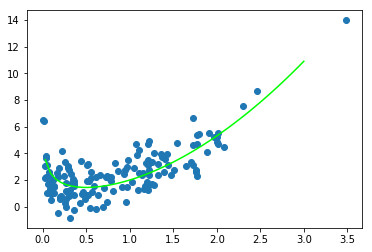

In [141]:
with sess.as_default():
    plt.scatter(training_inputs.eval(), training_labels.eval())
    plot_points = np.linspace(-3, 3, 100, dtype = np.float32)
    plt.plot(plot_points, truth(plot_points).eval().reshape(-1), c = [0, 1, 0])
    plt.plot(plot_points, model.predict(plot_points.reshape([100, 1, 1])).reshape(-1), c = [1, 0, 0])
    plt.show()

In [147]:
model.predict(np.array([[[.2]]]))

array([[[ nan]]], dtype=float32)

In [164]:
list(range(2, 4))

[2, 3]